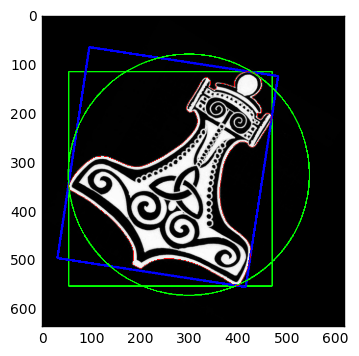

In [2]:
# %load contours_2.py
import cv2
import numpy as np
from matplotlib import pyplot as plot
%matplotlib inline

img = cv2.pyrDown(cv2.imread("hammer.jpg", cv2.IMREAD_UNCHANGED))

ret, thresh = cv2.threshold(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY) , 127, 255, cv2.THRESH_BINARY)
image, contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
  # find bounding box coordinates
  x,y,w,h = cv2.boundingRect(c)
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

  # find minimum area
  rect = cv2.minAreaRect(c)
  # calculate coordinates of the minimum area rectangle
  box = cv2.boxPoints(rect)
  # normalize coordinates to integers
  box = np.int0(box)
  # draw contours
  cv2.drawContours(img, [box], 0, (0,0, 255), 3)
  
  # calculate center and radius of minimum enclosing circle
  (x,y),radius = cv2.minEnclosingCircle(c)
  # cast to integers
  center = (int(x),int(y))
  radius = int(radius)
  # draw the circle
  img = cv2.circle(img,center,radius,(0,255,0),2)

cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
plot.imshow(img)
